> **Deep Learning Time Series Forecasting**:
>
> - Konstantinos Konstantinidis AEM:2546 konkonstant@uth.gr
> - Nikolaos Stavrinos          AEM:2631 nstavrinos@uth.gr

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import time



series = pd.read_csv('daily-minimum-temperatures.csv', header=0)
X=series.iloc[:,1:2].values


print(series.head(10))

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
5  1981-01-06  15.8
6  1981-01-07  15.8
7  1981-01-08  17.4
8  1981-01-09  21.8
9  1981-01-10  20.0


In [2]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

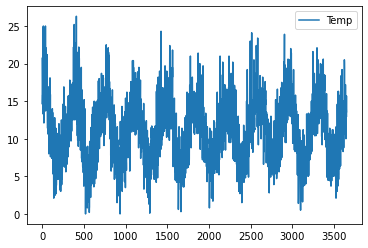

3650.0


In [3]:
series.plot()
plt.pyplot.show()

print(series.size/series.columns.size)

# Multi-layer perceptron

In [4]:
print(X.size)

X_train = []
y_train = []
for i in range(5, int(0.8*X.size)):
    X_train.append(X[i-5:i, 0])
    y_train.append(X[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_test = []
y_test = []
y_test=X[int(0.8*X.size):]
for i in range(int(0.8*X.size),X.size ):
    X_test.append(X[i-5:i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


X_train_dense = X_train



model = keras.Sequential()
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

start=time.time()
clf=model.fit(X_train_dense, y_train, epochs=100, batch_size = 32)
end=time.time()

print(model.summary())



3650
Epoch 1/100
92/92 [==============================] - 0s 707us/step - loss: 0.0241
Epoch 2/100
92/92 [==============================] - 0s 696us/step - loss: 0.0094
Epoch 3/100
92/92 [==============================] - 0s 696us/step - loss: 0.0093
Epoch 4/100
92/92 [==============================] - 0s 685us/step - loss: 0.0094
Epoch 5/100
92/92 [==============================] - 0s 685us/step - loss: 0.0093
Epoch 6/100
92/92 [==============================] - 0s 696us/step - loss: 0.0092
Epoch 7/100
92/92 [==============================] - 0s 674us/step - loss: 0.0092
Epoch 8/100
92/92 [==============================] - 0s 718us/step - loss: 0.0092
Epoch 9/100
92/92 [==============================] - 0s 696us/step - loss: 0.0092
Epoch 10/100
92/92 [==============================] - 0s 707us/step - loss: 0.0091
Epoch 11/100
92/92 [==============================] - 0s 717us/step - loss: 0.0091
Epoch 12/100
92/92 [==============================] - 0s 696us/step - loss: 0.0094
Epoch 13

In [5]:
print("It took '{}' seconds to to train the model".format(np.round(end-start,4)))

It took '7.1746' seconds to to train the model


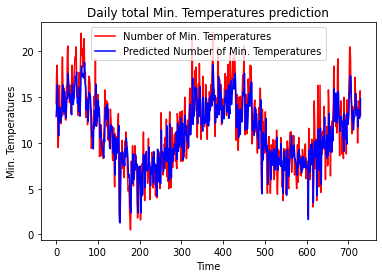

5.3004337288863175


In [6]:
X_test_dense = X_test
yhat = model.predict(X_test_dense)
yhat = sc.inverse_transform(yhat)
y_test = sc.inverse_transform(y_test)

plt.pyplot.plot(y_test, color = 'red', label = 'Number of Min. Temperatures')
plt.pyplot.plot(yhat, color = 'blue', label = 'Predicted Number of Min. Temperatures')
plt.pyplot.title('Daily total Min. Temperatures prediction')
plt.pyplot.xlabel('Time')
plt.pyplot.ylabel('Min. Temperatures')
plt.pyplot.legend()
plt.pyplot.show()

import math
from sklearn.metrics import mean_squared_error, accuracy_score
print(mean_squared_error(y_test, yhat))

# LSTM Neural network

In [7]:

X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape[0])
print(X_train.shape[1])


model2 = keras.Sequential()
model2.add(layers.LSTM(units = 100, activation='relu', return_sequences = True,input_shape=(X_train.shape[1], 1)))
model2.add(layers.LSTM(units = 100, activation='relu', return_sequences = True))
model2.add(layers.LSTM(units = 50, activation='relu', return_sequences = True))
model2.add(layers.LSTM(units = 1))
model2.compile(optimizer='adam', loss='mse')


start=time.time()
history =model2.fit(X_train_lstm, y_train, epochs = 100, batch_size = 32)
end=time.time()

print(model2.summary())



2915
5
Epoch 1/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0589
Epoch 2/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0142
Epoch 3/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0139
Epoch 4/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0137
Epoch 5/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0137
Epoch 6/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0133
Epoch 7/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0129
Epoch 8/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0123
Epoch 9/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0121
Epoch 10/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0113
Epoch 11/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0107
Epoch 12/100
92/92 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 13/100
92/92

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 100)            80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 50)             30200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 208       
Total params: 151,608
Trainable params: 151,608
Non-trainable params: 0
_________________________________________________________________
None


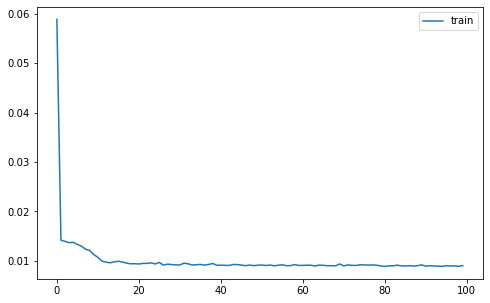

It took '94.7833' seconds to to train the model


In [8]:

plt.pyplot.figure(figsize=(8,5))
plt.pyplot.plot(history.history['loss'], label='train')
plt.pyplot.legend()
plt.pyplot.show()
print("It took '{}' seconds to to train the model".format(np.round(end-start,4)))

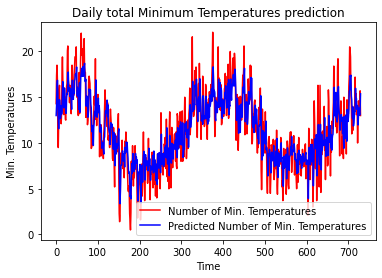

4.950634071197499


In [9]:
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
yhat_lstm = model2.predict(X_test_lstm)
yhat_lstm = sc.inverse_transform(yhat_lstm)



plt.pyplot.plot(y_test, color = 'red', label = 'Number of Min. Temperatures')
plt.pyplot.plot(yhat_lstm, color = 'blue', label = 'Predicted Number of Min. Temperatures')
plt.pyplot.title('Daily total Minimum Temperatures prediction')
plt.pyplot.xlabel('Time')
plt.pyplot.ylabel('Min. Temperatures')
plt.pyplot.legend()
plt.pyplot.show()

import math
from sklearn.metrics import mean_squared_error, accuracy_score
print(mean_squared_error(y_test, yhat_lstm))

# CNN

In [10]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
print(X_train.shape[0])
print(X_train.shape[1])
n_features = 1
X_train_cnn = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], n_features))
# define model
model3 = keras.Sequential()
model3.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu'))#,input_shape=(60, n_features)))
model3.add(layers.MaxPooling1D(pool_size=2))
model3.add(layers.Flatten())
model3.add(layers.Dense(50, activation='relu'))
model3.add(layers.Dense(1))
model3.compile(optimizer='adam', loss='mse')
# fit model
start=time.time()
clf=model3.fit(X_train_cnn, y_train, epochs=2000, verbose=0)
end=time.time()



2915
5


In [11]:
print("It took '{}' seconds to to train the model".format(np.round(end-start,4)))

It took '103.6447' seconds to to train the model


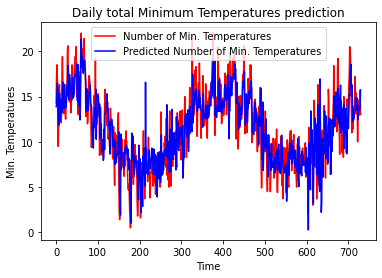

6.2441051787928785


In [12]:
# demonstrate prediction

X_test_cnn = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], n_features))
yhat = model3.predict(X_test_cnn)
yhat = sc.inverse_transform(yhat)


plt.pyplot.plot(y_test, color = 'red', label = 'Number of Min. Temperatures')
plt.pyplot.plot(yhat, color = 'blue', label = 'Predicted Number of Min. Temperatures')
plt.pyplot.title('Daily total Minimum Temperatures prediction')
plt.pyplot.xlabel('Time')
plt.pyplot.ylabel('Min. Temperatures')
plt.pyplot.legend()
plt.pyplot.show()

import math
from sklearn.metrics import mean_squared_error, accuracy_score
print(mean_squared_error(y_test, yhat))

In [13]:
print(X.size)

3650
